In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data = pd.read_csv('munnar.csv')

data

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654
...,...,...,...,...,...,...,...,...,...,...
69,The Fog Munnar (Resort & Spa),4.5,Excellent,292,5.0,Ettycity Road,city centre,13.2 km,"8,103","2,178"
70,Skylark Holidays | Rooms & Caretaker,4.1,Very Good,17,NaN,Chinnakanal,city centre,20.6 km,"3,317",684
71,Deshadan Mountain Resort- The highest resort i...,4.3,Excellent,395,4.0,Pallivasal,city centre,5.8 km,"3,953",808
72,Nature Zone Jungle Resort,4.1,Very Good,187,4.0,Pallivasal,city centre,6.6 km,"6,862","2,124"


**About Dataset**

Tourism and hospitality industry is evolving in Kerala in the recent years, especially in Munnar. Here I have scraped hotel data from MakeMyTrip of those situated in Munnar. Munnar is an amazing hill station, which makes a large contribution to tea exports from the country.

**Columns in dataset:**

- Hotel Name
- Rating
- Rating Description
- Reviews
- Star rating
- Location
- Nearest Landmark
- Distance to the Landmark
- Price
- Tax
- Please Note:

Price given here is for one night (base room).
Tax given here is slapped on top of the price payable. Therefore, total amount = Price + Tax

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name									   74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB


In [114]:
data.describe()

,Rating,Reviews,Star Rating
count,74.000000,74.000000,57.000000
mean,4.068919,375.810811,3.912281
std,0.401001,383.407208,0.808011
min,2.800000,6.000000,2.000000
25%,3.900000,112.250000,3.000000
50%,4.100000,240.500000,4.000000
75%,4.300000,437.000000,5.000000
max,4.800000,1934.000000,5.000000


**CLEANING THE DATA**

In [116]:
data.rename(columns={'Hotel Name\t\t\t\t\t\t\t\t\t': 'Hotel Name'}, inplace=True)
data['Price'] = data['Price'].str.replace(',','').astype(float)


In [ ]:
data[data['Tax'].isna()]

In [117]:
data['Tax'] = data['Tax'].str.replace(',','').astype(float)

In [118]:
data['Tax'] = data['Tax'].fillna(0)
data[data['Tax'].isna()]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax


In [119]:
data['total_amount'] = data['Price'] + data['Tax']

In [120]:
# Display the top 10 hotels with the highest ratings
df_sorted_by_rating = data.sort_values(by="Rating", ascending=False)
top_rated_hotels = df_sorted_by_rating.head(10)
print("Top 10 Hotels with the Highest Ratings:")
top_rated_hotels[["Hotel Name", "Rating",'Rating Description', 'Location','total_amount']]

Top 10 Hotels with the Highest Ratings:


,Hotel Name,Rating,Rating Description,Location,total_amount
27,Chandys Windy Woods,4.8,Excellent,Chithirapuram,9000.0
64,The Wild Trails Munnar,4.7,Excellent,Mankulam,9356.0
30,Munnar Ice Queen | Rooms & Cottages\nLike a 3,4.7,Excellent,Muthuvaankudi,3006.0
18,The Panoramic Getaway,4.6,Excellent,Chithirapuram,16591.0
36,ELEPHANT PASSAGE,4.6,Excellent,Anachal,13806.0
15,Vibe Munnar,4.6,Excellent,Ettycity Road,10285.0
54,SpiceTree Munnar Boutique Resort,4.6,Excellent,Periyakanal-Muttukad Road,13669.0
38,Fragrant Nature Munnar,4.5,Excellent,Pallivasal,12272.0
16,Landy Queen Homestay | Rooms & Caretaker,4.5,Excellent,Central Munnar,1548.0
69,The Fog Munnar (Resort & Spa),4.5,Excellent,Ettycity Road,10281.0


In [121]:
# Sort the DataFrame by Price in descending order
df_sorted_by_price = data.sort_values(by="total_amount", ascending=False)

# Display the top 10 hotels with the highest prices
top_priced_hotels = df_sorted_by_price.head(10)
print("\nTop 10 Hotels with the Highest Prices:")
top_priced_hotels[["Hotel Name", "total_amount",'Rating','Rating Description','Location']]


Top 10 Hotels with the Highest Prices:


,Hotel Name,total_amount,Rating,Rating Description,Location
18,The Panoramic Getaway,16591.0,4.6,Excellent,Chithirapuram
36,ELEPHANT PASSAGE,13806.0,4.6,Excellent,Anachal
54,SpiceTree Munnar Boutique Resort,13669.0,4.6,Excellent,Periyakanal-Muttukad Road
11,Parakkat Nature Resorts,12659.0,4.3,Excellent,Pallivasal
38,Fragrant Nature Munnar,12272.0,4.5,Excellent,Pallivasal
45,Mountain Club Resort Munnar,11948.0,4.3,Excellent,Chinnakanal
15,Vibe Munnar,10285.0,4.6,Excellent,Ettycity Road
69,The Fog Munnar (Resort & Spa),10281.0,4.5,Excellent,Ettycity Road
22,Elixir Hills Suites Resort & Spa,9876.0,4.2,Very Good,Laxmi Estate
64,The Wild Trails Munnar,9356.0,4.7,Excellent,Mankulam


<AxesSubplot: >

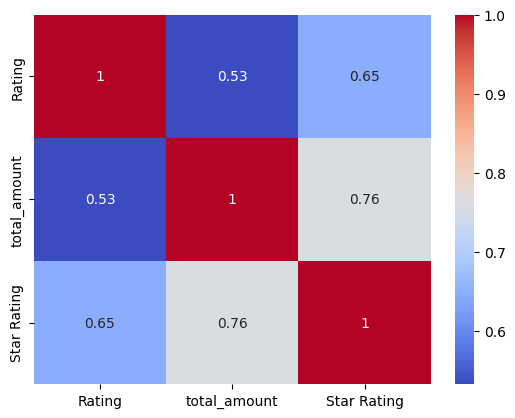

In [143]:
corr_matrix = data[['Rating', 'total_amount','Star Rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

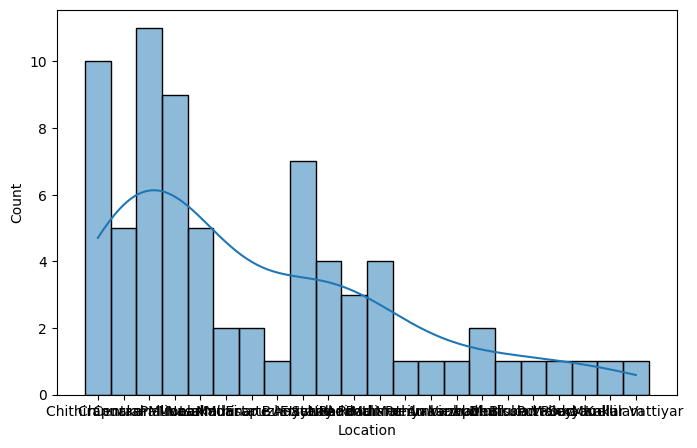

In [139]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="Location", bins=20, kde=True)
plt.show()

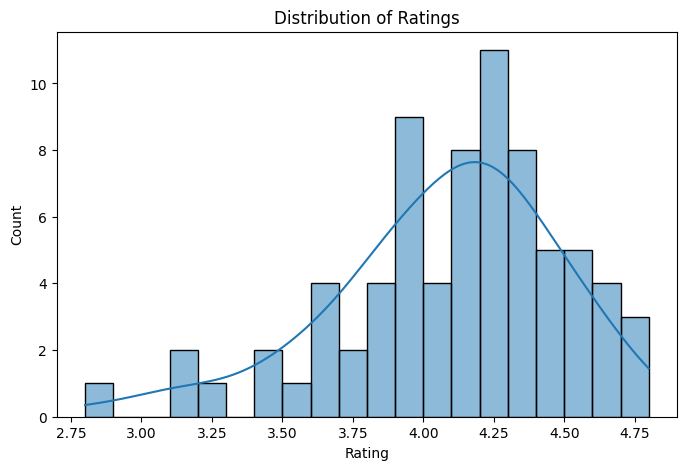

In [138]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="Rating", bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

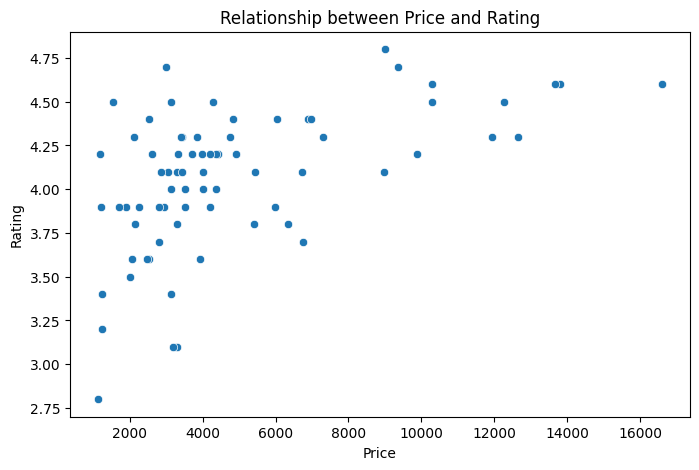

In [127]:
# Visualize the relationship between price and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="total_amount", y="Rating")
plt.title("Relationship between Price and Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

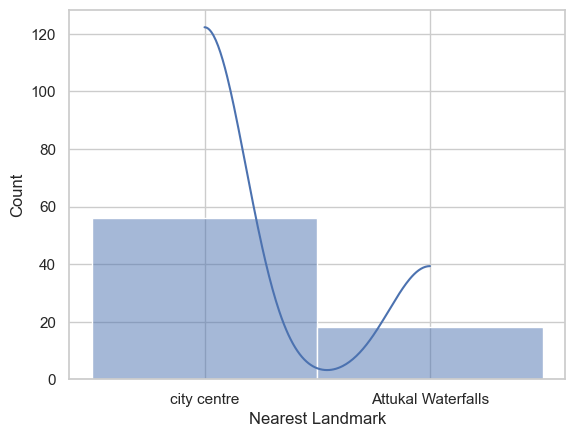

In [149]:
# Visualize the distribution of ratings
sns.histplot(data=data, x="Nearest Landmark", bins=20, kde=True)
plt.show()